## Historic Redlining + Health Index Maps
### Team Code & Cry

In this notebook, we've pulled together the geographic data and boundaries from historic redlining maps, per the [Mapping Inequality Project](https://dsl.richmond.edu/panorama/redlining/#loc=13/37.76/-122.445&city=san-francisco-ca). Although this notebook mainly recreates existing redlining maps, it does so in a way that is more interactive and can be used in conjunction with other data sets throughout the entirety of our project. Additionally, it allows us to situate historically redlined areas within the context of current neighborhood boundaries.

As seen below, we start by simply processing and visualizing the original boundaries of redlined areas within San Francisco. Then, based on work done by the Mapping Inequality Project to assign these redlined boundaries to 2020 census tracts, we create interactive redlining maps that can be used to figure out how larger neighborhood groups were graded within the context of the original HOLC redlining maps.

## Mapping Redlining to (2020) Census Tract Boundaries

Now that we have visualized the original HOLC map for San Francisco, it’s time to try and retrofit
these redlined areas to 2020 census tracts. Ultimately, the goal is to merge data and create maps
that not only shows the grade assigned to each tract, but the larger neighborhood to which that
grade now applies.

In [1]:
# import libraries
import pandas as pd
import geopandas as gpd

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

In [2]:
# bringing over the redlining to census tract data from the Mapping Inequality Project github
ct = gpd.read_file("https://raw.githubusercontent.com/americanpanorama/Census_HOLC_Research/main/2020_Census_Tracts/Tracts_2020_HOLC.geojson")

In [3]:
ct.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42074 entries, 0 to 42073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OBJECTID          42074 non-null  int64   
 1   GISJOIN           42074 non-null  object  
 2   neighborho        42074 non-null  int64   
 3   SUM_Perc          42074 non-null  float64 
 4   FIRST_holc_grade  42074 non-null  object  
 5   MAX_state         42074 non-null  object  
 6   MAX_city          42074 non-null  object  
 7   Shape_Length      42074 non-null  float64 
 8   Shape_Area        42074 non-null  float64 
 9   geometry          42074 non-null  geometry
dtypes: float64(3), geometry(1), int64(2), object(4)
memory usage: 3.2+ MB


Wow, this is a huge file. It seems that the Mapping Inequality Project only lets you bring over
2020 census tract/redlining data for all U.S. cities at the same time.
In a bit, we’ll need ot run a loop so that we’re just working with data from San Francisco, specifically.

In [4]:
#seeing what the data looks like
ct.head(3)

,OBJECTID,GISJOIN,neighborho,SUM_Perc,FIRST_holc_grade,MAX_state,MAX_city,Shape_Length,Shape_Area,geometry
0,1,G0100730000100,180,0.092969,D,AL,Birmingham,3336.386272,7.095820e+05,"POLYGON ((-86.71213 33.59389, -86.71218 33.594..."
1,2,G0100730000100,181,0.161693,D,AL,Birmingham,7731.380924,1.234060e+06,"POLYGON ((-86.72188 33.58805, -86.72322 33.589..."
2,3,G0100730000100,182,0.170326,D,AL,Birmingham,6111.241095,1.300062e+06,"POLYGON ((-86.72644 33.56609, -86.73380 33.569..."


In [5]:
# creating a query to just pull redlining/census tract data that falls within San Francisco
ct.query("MAX_city == 'San Francisco'")

,OBJECTID,GISJOIN,neighborho,SUM_Perc,FIRST_holc_grade,MAX_state,MAX_city,Shape_Length,Shape_Area,geometry
4857,4858,G0600750010101,737,0.000273,D,CA,San Francisco,66.821534,190.019325,"POLYGON ((-122.41853 37.80596, -122.41877 37.8..."
4858,4859,G0600750010101,745,0.023125,C,CA,San Francisco,755.952555,16116.899020,"POLYGON ((-122.40515 37.80477, -122.40516 37.8..."
4859,4860,G0600750010201,730,0.005193,C,CA,San Francisco,439.611407,970.438770,"POLYGON ((-122.42461 37.80138, -122.42465 37.8..."
4860,4861,G0600750010201,732,0.991968,C,CA,San Francisco,1806.228464,185369.402308,"POLYGON ((-122.41816 37.80314, -122.41865 37.8..."
4861,4862,G0600750010201,733,0.002839,C,CA,San Francisco,213.541662,530.455183,"POLYGON ((-122.42479 37.80228, -122.42485 37.8..."
...,...,...,...,...,...,...,...,...,...,...
5467,5468,G0600810600402,790,0.005356,C,CA,San Francisco,520.293627,2155.063525,"POLYGON ((-122.44976 37.70822, -122.45017 37.7..."
5468,5469,G0600810600701,788,0.029118,C,CA,San Francisco,1486.619592,15236.603137,"POLYGON ((-122.46104 37.70824, -122.46129 37.7..."
5469,5470,G0600810600701,789,0.015979,D,CA,San Francisco,1151.050874,8360.211548,"POLYGON ((-122.45452 37.70824, -122.45520 37.7..."
5470,5471,G0600810600701,790,0.000647,C,CA,San Francisco,125.541397,338.527576,"POLYGON ((-122.45248 37.70815, -122.45284 37.7..."


Great, that worked! It looks like there are 526 areas that are fitted to 2020 census tracts in
San Francisco. Let’s try to map them and figure out their rpesective HOLC grade and current
neighborhood:

In [6]:
# create a list of routes
cities = ["San Francisco"]

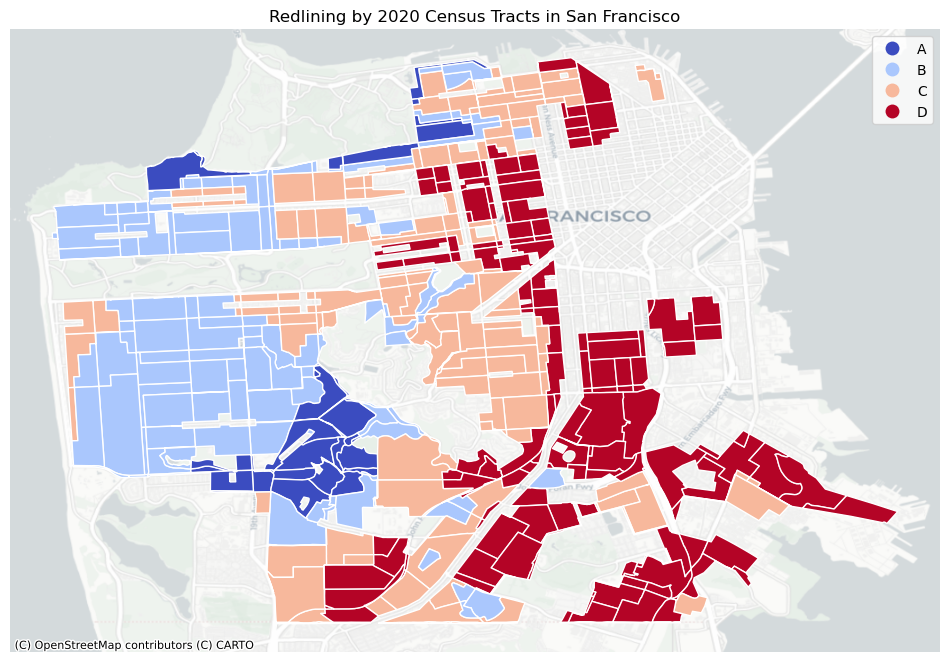

In [7]:
# # creating a color coded map of SF census tracts, according to HOLC grade
for MAX_city in cities:

    # map it
    fig, ax = plt.subplots(figsize=(12,10))

    # map options: notice the query to filter by individual city
    ct[ct.MAX_city == MAX_city].plot(column = 'FIRST_holc_grade',legend=True,
  edgecolor='white',cmap = 'coolwarm',ax=ax)
    # no axes
    ax.axis('off')

    # title
    ax.set_title('Redlining by 2020 Census Tracts in San Francisco')
    
    ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron, crs=4326)

In [8]:
#bringing in the SF Neighborhood Analysis by 2020 Census Tract spatial data from DataSF to merge
nhoods = gpd.read_file('data/SF2020_Neighborhoods_CTs.geojson')

In [9]:
nhoods.head(4)

,name,neighborhoods_analysis_boundaries,tractce,sup_dist_2022,data_loaded_at,county_fp,state_fp,sup_dist_2012,data_as_of,object_id,geoid,geometry
0,9809,Bayview Hunters Point,980900,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,242,06075980900,"MULTIPOLYGON (((-122.37276 37.74551, -122.3727..."
1,9806,Bayview Hunters Point,980600,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,241,06075980600,"MULTIPOLYGON (((-122.36519 37.73373, -122.3665..."
2,9805.01,McLaren Park,980501,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,240,06075980501,"MULTIPOLYGON (((-122.40667 37.71921, -122.4069..."
3,9804.01,The Farallones,980401,4,2022-07-08 14:12:00,075,06,1,2022-07-08 21:09:48.141,239,06075980401,"MULTIPOLYGON (((-123.00360 37.69325, -123.0040..."


In [10]:
#dropping the Farrollones census tract because it has messed with our maps in the past
nhoods = nhoods.drop(labels=3, axis=0)

In [11]:
#defining which columns to keep moving forward
columns_to_keep = ['neighborhoods_analysis_boundaries',
                   'tractce']

In [12]:
#looing at the data and columns we've decided to keep
nhoods2 = nhoods[columns_to_keep].copy()
nhoods2

,neighborhoods_analysis_boundaries,tractce
0,Bayview Hunters Point,980900
1,Bayview Hunters Point,980600
2,McLaren Park,980501
4,Bayview Hunters Point,061200
5,Chinatown,061102
...,...,...
237,Russian Hill,010901
238,Chinatown,010702
239,North Beach,010401
240,Tenderloin,012204


In [13]:
#renaming the two remaining columns
nhoods2.columns = ['Neighborhood', 
                  'Census Tract',]

In [14]:
#double checking the renamining worked
nhoods2.head(3)

,Neighborhood,Census Tract
0,Bayview Hunters Point,980900
1,Bayview Hunters Point,980600
2,McLaren Park,980501


In [15]:
#creating a full FIPS code column that matches the formatting of the Mapping Inequality Project data 
#this will enable us to finally merge the two data sets
nhoods2['GISJOIN'] ='G060' + '0750' + nhoods2['Census Tract']

In [16]:
#double checking that the merge worked
nhoods2.head(3)

,Neighborhood,Census Tract,GISJOIN
0,Bayview Hunters Point,980900,G0600750980900
1,Bayview Hunters Point,980600,G0600750980600
2,McLaren Park,980501,G0600750980501


In [17]:
#merging the two data sets so that we can visualize the redlined areas alongside their grades and neighborhoods
sf=ct.merge(nhoods2,on="GISJOIN")

In [18]:
sf.sample(3)

,OBJECTID,GISJOIN,neighborho,SUM_Perc,FIRST_holc_grade,MAX_state,MAX_city,Shape_Length,Shape_Area,geometry,Neighborhood,Census Tract
358,5216,G0600750030800,779,0.000509,A,CA,San Francisco,344.878134,632.774156,"MULTIPOLYGON (((-122.46283 37.74335, -122.4628...",West of Twin Peaks,030800
79,4937,G0600750015100,741,0.012028,D,CA,San Francisco,1065.654627,2069.300538,"POLYGON ((-122.42562 37.78995, -122.42563 37.7...",Western Addition,015100
168,5026,G0600750020402,798,0.005949,C,CA,San Francisco,1231.814807,3512.927758,"MULTIPOLYGON (((-122.44016 37.75899, -122.4403...",Twin Peaks,020402


In [19]:
#pulling info on our new, merged data set
sf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OBJECTID          517 non-null    int64   
 1   GISJOIN           517 non-null    object  
 2   neighborho        517 non-null    int64   
 3   SUM_Perc          517 non-null    float64 
 4   FIRST_holc_grade  517 non-null    object  
 5   MAX_state         517 non-null    object  
 6   MAX_city          517 non-null    object  
 7   Shape_Length      517 non-null    float64 
 8   Shape_Area        517 non-null    float64 
 9   geometry          517 non-null    geometry
 10  Neighborhood      517 non-null    object  
 11  Census Tract      517 non-null    object  
dtypes: float64(3), geometry(1), int64(2), object(6)
memory usage: 52.5+ KB


In [20]:
#continuing to clean the data and rename which columns we want to keep
columns_to_keep = ['Neighborhood',
                    'Census Tract', 
                  'FIRST_holc_grade',
                  'geometry']

In [21]:
sf2 = sf[columns_to_keep].copy()
sf2.head(3)

,Neighborhood,Census Tract,FIRST_holc_grade,geometry
0,North Beach,010101,D,"POLYGON ((-122.41853 37.80596, -122.41877 37.8..."
1,North Beach,010101,C,"POLYGON ((-122.40515 37.80477, -122.40516 37.8..."
2,Russian Hill,010201,C,"POLYGON ((-122.42461 37.80138, -122.42465 37.8..."


In [22]:
#renaming columns
sf2.columns = ['Neighborhood',
                   'Census Tract', 
                  'HOLC Grade',
                  'geometry']

In [23]:
#checking to see if our column renaming worked
sf2.head(3)

,Neighborhood,Census Tract,HOLC Grade,geometry
0,North Beach,010101,D,"POLYGON ((-122.41853 37.80596, -122.41877 37.8..."
1,North Beach,010101,C,"POLYGON ((-122.40515 37.80477, -122.40516 37.8..."
2,Russian Hill,010201,C,"POLYGON ((-122.42461 37.80138, -122.42465 37.8..."


In [24]:
# creating a more interactive and color coded map, according to HOLC grade
# when you hove over each area, you can see its HOLC grade - as well as the corresponding tract and neighborhood
sf2.explore(
     column="HOLC Grade", # make choropleth based on "holc grade" column
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="Reds", # use "Reds" matplotlib colormap
     style_kwds=dict(color="white") # use white outline
    )

In [25]:
sf2['FIPS'] ='6' + '075' + sf2['Census Tract']

In [26]:
sf2.head(3)

,Neighborhood,Census Tract,HOLC Grade,geometry,FIPS
0,North Beach,010101,D,"POLYGON ((-122.41853 37.80596, -122.41877 37.8...",6075010101
1,North Beach,010101,C,"POLYGON ((-122.40515 37.80477, -122.40516 37.8...",6075010101
2,Russian Hill,010201,C,"POLYGON ((-122.42461 37.80138, -122.42465 37.8...",6075010201


In [27]:
health=pd.read_csv('data/sf_healthindex.csv')

In [28]:
health.head(3)

,FIPS,Pollution_Burden_Pctl,Asthma_Pctl,Low_Birth_Weight_Pctl,Cardiovascular_Disease_Pctl,Poverty_Pctl,Health_Index
0,6075023200,88.31,96.44,96.82,45.80,49.12,376.49
1,6075017902,88.51,94.28,98.20,9.73,95.90,386.62
2,6075023103,81.89,96.44,95.32,45.80,97.95,417.40


In [29]:
columns_to_keep = ['FIPS',
                   'Health_Index']

In [30]:
health2 = health[columns_to_keep].copy()
health2.head(3)

,FIPS,Health_Index
0,6075023200,376.49
1,6075017902,386.62
2,6075023103,417.40


In [31]:
health2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FIPS          195 non-null    int64  
 1   Health_Index  195 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [32]:
health2['FIPS'] = health2['FIPS'].apply(str)

In [33]:
health2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FIPS          195 non-null    object 
 1   Health_Index  195 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [34]:
sf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Neighborhood  517 non-null    object  
 1   Census Tract  517 non-null    object  
 2   HOLC Grade    517 non-null    object  
 3   geometry      517 non-null    geometry
 4   FIPS          517 non-null    object  
dtypes: geometry(1), object(4)
memory usage: 24.2+ KB


In [35]:
map=sf2.merge(health2,on="FIPS")

In [36]:
map.head(3)

,Neighborhood,Census Tract,HOLC Grade,geometry,FIPS,Health_Index
0,Russian Hill,010300,C,"POLYGON ((-122.41724 37.79853, -122.41715 37.7...",6075010300,121.10
1,Russian Hill,010300,D,"POLYGON ((-122.41853 37.80596, -122.41873 37.8...",6075010300,121.10
2,Financial District/South Beach,010500,C,"POLYGON ((-122.40515 37.80477, -122.40519 37.8...",6075010500,198.99


In [37]:
map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Neighborhood  397 non-null    object  
 1   Census Tract  397 non-null    object  
 2   HOLC Grade    397 non-null    object  
 3   geometry      397 non-null    geometry
 4   FIPS          397 non-null    object  
 5   Health_Index  397 non-null    float64 
dtypes: float64(1), geometry(1), object(4)
memory usage: 21.7+ KB


In [38]:
columns_to_keep = ['Health_Index',
                    'HOLC Grade',
                   'Neighborhood',
                    'Census Tract',
                  'geometry']
map2 = map[columns_to_keep].copy()
map2.head(3)

,Health_Index,HOLC Grade,Neighborhood,Census Tract,geometry
0,121.10,C,Russian Hill,010300,"POLYGON ((-122.41724 37.79853, -122.41715 37.7..."
1,121.10,D,Russian Hill,010300,"POLYGON ((-122.41853 37.80596, -122.41873 37.8..."
2,198.99,C,Financial District/South Beach,010500,"POLYGON ((-122.40515 37.80477, -122.40519 37.8..."


In [39]:
map2.columns = ['Health Index',
                    'HOLC Grade',
                   'Neighborhood',
                    'Census Tract',
                  'geometry']

In [40]:
map2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Health Index  397 non-null    float64 
 1   HOLC Grade    397 non-null    object  
 2   Neighborhood  397 non-null    object  
 3   Census Tract  397 non-null    object  
 4   geometry      397 non-null    geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 18.6+ KB


In [41]:
m = map2.explore(
     column="Health Index", # make choropleth based on "holc grade" column
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="Reds", # use "Reds" matplotlib colormap
     style_kwds=dict(color="white") # use white outline
    )


In [44]:
map2.explore(
     column="HOLC Grade", # make choropleth based on "holc grade" column
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="Reds", # use "Reds" matplotlib colormap
     style_kwds=dict(color="white") # use white outline
    )
